<a href="https://www.kaggle.com/code/akshaypharande/glass-type-classification-using-machine-learning?scriptVersionId=118002532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Glass Type classification 
Hey there,"welcome" to my first notebook. I hope you benefit this notebook.
In this notebook, I am going to use "Decision tree" and "K-nearest Neighbors" algorithm.

## Prepare problem

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# loading the pre-processed dataset
data = pd.read_csv('../input/glass/glass.csv')

In [3]:
#shape of the data
data.shape

(214, 10)

In [4]:
#first five rows of the data
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#checking missing values in the data
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
# checking the data type
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

## descriptive statastics

In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

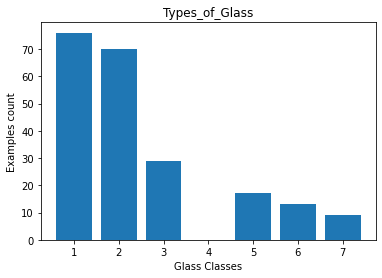

In [9]:
# data visualization
glass_classes = data['Type'].unique()
values = data['Type'].value_counts()

plt.bar(glass_classes, values)
plt.title('Types_of_Glass')
plt.xlabel('Glass Classes')
plt.ylabel('Examples count')
plt.show()

In [10]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop(['Type'], axis=1)

# storing the dependent variable as y
y = data['Type']

In [11]:
# shape of independent and dependent variables
X.shape, y.shape

((214, 9), (214,))

In [12]:
#importing sklearn and train_test_split to create validation set
import sklearn
from sklearn.model_selection import train_test_split
#creating the train and validation set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state = 70)

In [13]:
# distribution in training set
y_train.value_counts(normalize=True)

2    0.356725
1    0.327485
7    0.134503
3    0.081871
5    0.058480
6    0.040936
Name: Type, dtype: float64

In [14]:
# distribution in testing set
y_test.value_counts(normalize=True)

2    0.348837
1    0.325581
7    0.139535
5    0.069767
3    0.069767
6    0.046512
Name: Type, dtype: float64

In [15]:
#shape of training set
X_train.shape, y_train.shape

((171, 9), (171,))

In [16]:
#shape of testing set
X_test.shape,y_test.shape

((43, 9), (43,))

## Decision Tree 

In [17]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [18]:
#fitting the model
dt_model = DecisionTreeClassifier(random_state=10)

In [19]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [20]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [21]:
#checking the validation score
dt_model.score(X_test, y_test)

0.6511627906976745

In [22]:
#predictions on validation set
dt_predict=dt_model.predict(X_test)

In [23]:
dt_predict

array([1, 2, 7, 1, 2, 7, 2, 2, 1, 3, 7, 7, 1, 1, 6, 1, 1, 2, 6, 1, 1, 1,
       7, 2, 2, 1, 5, 2, 1, 1, 1, 2, 1, 1, 2, 6, 6, 2, 1, 2, 2, 1, 1])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dt_predict)

0.6511627906976745

# Finding optimum max_depth

In [25]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,15):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=6)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_test, y_test))

In [26]:
frame = pd.DataFrame({'max_depth':range(1,15), 'train_acc':train_accuracy, 'test_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.473684,0.465116
1,2,0.637427,0.581395
2,3,0.742690,0.604651
3,4,0.783626,0.627907
4,5,0.842105,0.651163


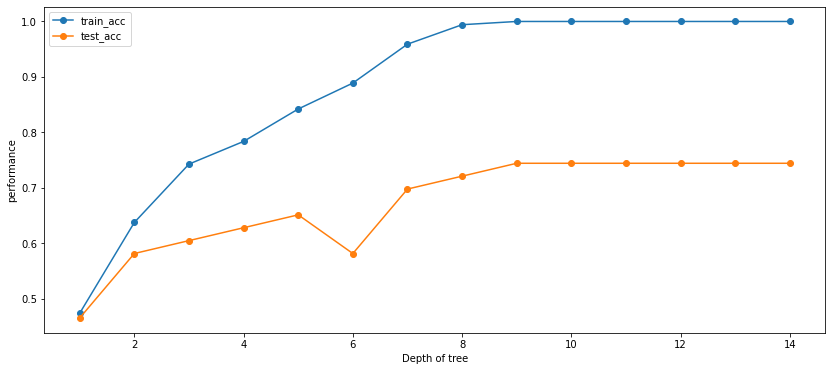

In [27]:
plt.figure(figsize=(14,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['train_acc','test_acc'])

In [28]:
# max. depth goes on increasing till max. depth is 9 after that remain const. 
dt_model = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=35, random_state=10)

In [29]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=35, random_state=10)

In [30]:
#Training score
dt_model.score(X_train, y_train)

0.9883040935672515

In [31]:
#Validation score
dt_model.score(X_test, y_test)

0.7441860465116279

In [32]:
dt_predict1=dt_model.predict(X_test)

In [33]:
dt_predict1

array([1, 7, 7, 1, 2, 7, 2, 2, 1, 3, 7, 7, 1, 1, 6, 1, 2, 2, 6, 1, 2, 1,
       7, 2, 2, 1, 5, 3, 1, 1, 1, 2, 1, 1, 2, 6, 6, 1, 1, 2, 2, 1, 1])

In [34]:
accuracy_score(y_test,dt_predict1)

0.7441860465116279

In [35]:
# Get the confusion Matrix of the Model
cnf_matrix = metrics.confusion_matrix(y_test,dt_predict1)
cnf_matrix

array([[13,  0,  1,  0,  0,  0],
       [ 3, 10,  0,  0,  2,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0,  0,  5]])

Text(0.5, 257.44, 'Predicted label')

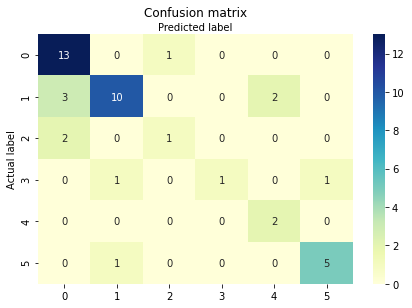

In [36]:
# Plot the Confusion Matrix as a HeatMap
import seaborn as sns
class_names=[1,2,3,5,6,7] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print(metrics.classification_report(y, dt_model.predict(X),zero_division=1)) # Displays a comprehensive Report of the DT Model

              precision    recall  f1-score   support

           1       0.92      0.97      0.94        70
           2       0.96      0.93      0.95        76
           3       0.93      0.82      0.87        17
           5       1.00      0.85      0.92        13
           6       0.82      1.00      0.90         9
           7       0.97      0.97      0.97        29

    accuracy                           0.94       214
   macro avg       0.93      0.92      0.92       214
weighted avg       0.94      0.94      0.94       214



In [38]:
from sklearn import tree

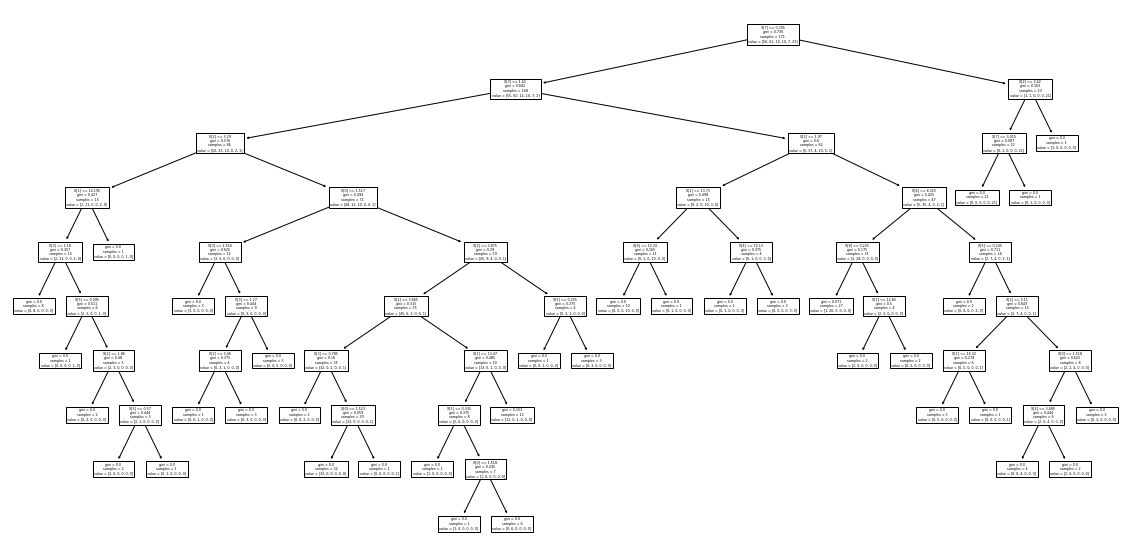

In [39]:
plt.figure(figsize = (20,10))
tree.plot_tree(dt_model);

# K-Nearest Neighbour

In [40]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN

In [41]:
# important to mention that n_neighbors = 5, is not a multiple value of our quantity of features
clf = KNN(n_neighbors = 5)

# Fitting the model
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
predict_type_n = clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict_type_n)

0.6976744186046512

# finding optimum k value

In [44]:
train_accuracy = []
validation_accuracy = []
for i in range(1,15):
    clf = KNN(n_neighbors = i)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    validation_accuracy.append(clf.score(X_test, y_test))

In [45]:
frame = pd.DataFrame({'n_neighbors':range(1,15), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head(10)

,n_neighbors,train_acc,valid_acc
0,1,1.000000,0.767442
1,2,0.836257,0.697674
2,3,0.842105,0.697674
3,4,0.789474,0.651163
4,5,0.760234,0.697674
5,6,0.748538,0.651163
6,7,0.730994,0.697674
7,8,0.701754,0.697674
8,9,0.672515,0.697674
9,10,0.678363,0.651163


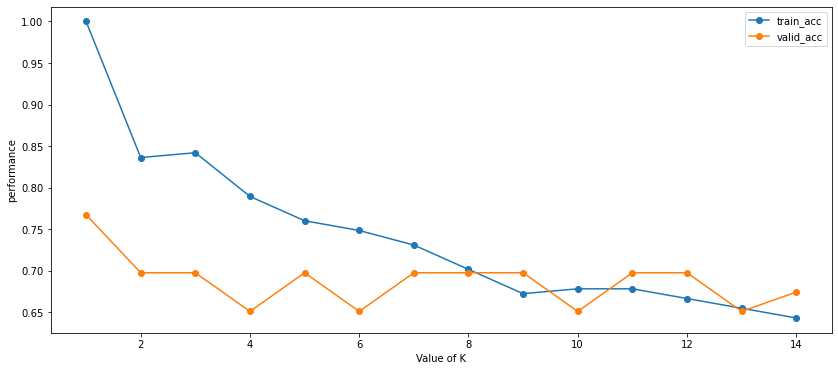

In [46]:
plt.figure(figsize=(14,6))
plt.plot(frame['n_neighbors'], frame['train_acc'], marker='o')
plt.plot(frame['n_neighbors'], frame['valid_acc'], marker='o')
plt.xlabel('Value of K')
plt.ylabel('performance')
plt.legend(['train_acc','valid_acc'])

In [47]:
clf = KNN(n_neighbors = 8)
clf.fit(X_train, y_train)
#Training score
clf.score(X_train, y_train)

0.7017543859649122

In [48]:
predict_type_n_2 = clf.predict(X_test)
predict_type_n_2

array([2, 2, 7, 1, 1, 7, 2, 2, 1, 1, 7, 7, 2, 1, 1, 1, 2, 2, 5, 1, 2, 1,
       7, 5, 2, 3, 5, 1, 1, 2, 3, 2, 1, 1, 5, 6, 7, 1, 1, 2, 2, 1, 1])

In [49]:
accuracy_score(y_test,predict_type_n_2)

0.6976744186046512

In [50]:
# Get the confusion Matrix of the Model
cnf_matrix_1 = metrics.confusion_matrix(y_test,predict_type_n_2)
cnf_matrix_1

array([[11,  2,  1,  0,  0,  0],
       [ 4, 10,  0,  1,  0,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  1,  0,  5]])

Text(0.5, 257.44, 'Predicted label')

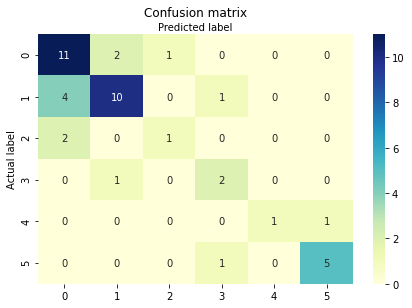

In [51]:
# Plot the Confusion Matrix as a HeatMap
class_names=[1,2,3,5,6,7] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
print(metrics.classification_report(y, clf.predict(X),zero_division=1)) # Displays a comprehensive Report of the KNN Model

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        70
           2       0.75      0.71      0.73        76
           3       0.50      0.12      0.19        17
           5       0.62      0.62      0.62        13
           6       0.80      0.44      0.57         9
           7       0.88      0.76      0.81        29

    accuracy                           0.70       214
   macro avg       0.70      0.58      0.61       214
weighted avg       0.70      0.70      0.68       214



# SVM

In [53]:
from sklearn.svm import SVC


In [54]:
clf_1=SVC(kernel='linear')

In [55]:
clf_1.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
clf_1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [57]:
y_pred = clf_1.predict(X_test)

In [58]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5813953488372093


In [59]:
# Get the confusion Matrix of the Model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  4,  0,  0,  0,  0],
       [ 6,  8,  0,  0,  1,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  0,  5]])

Text(0.5, 257.44, 'Predicted label')

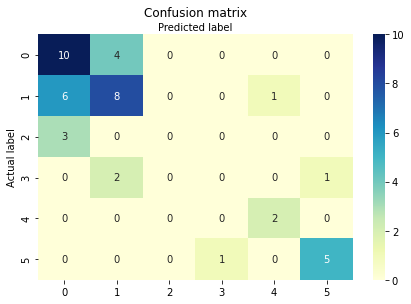

In [60]:
# Plot the Confusion Matrix as a HeatMap
import seaborn as sns
class_names=[1,2,3,5,6,7] # Name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
print(metrics.classification_report(y, clf_1.predict(X),zero_division=1)) # Displays a comprehensive Report of the SVC Model

              precision    recall  f1-score   support

           1       0.65      0.73      0.68        70
           2       0.61      0.71      0.66        76
           3       1.00      0.00      0.00        17
           5       0.80      0.62      0.70        13
           6       0.80      0.89      0.84         9
           7       0.96      0.90      0.93        29

    accuracy                           0.69       214
   macro avg       0.80      0.64      0.63       214
weighted avg       0.72      0.69      0.66       214



## THANK YOU.....